In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts import velocity, velocity_split, acceleration, quadrupole_moment, qdrpl_trajectory
from fromACC import MassPoint

ImportError: cannot import name 'velocity' from 'scripts' (c:\ProgramData\Anaconda3\lib\site-packages\scripts\__init__.py)

In [9]:
help(velocity)
help(velocity_split)
help(acceleration)

Help on function velocity in module scripts:

velocity(position, time)
    Simple v = r/t calc, gives v at each new time step
    Inputs:
        position = [ [x0, y0], [x1, y1], [x2, y2], [x3, y3] ]
        time = [t0, t1, t2, t3]

Help on function velocity_split in module scripts:

velocity_split(xpos, ypos, time)
    Same v =r/t calc as func(velocity), but accepts separate position inputs for x and y
    e.g. xpos = [x0, x1, x2, x3]
         ypos = [y0, y1, y2, y3]

Help on function acceleration in module scripts:

acceleration(velocity, time)
    a = v/t calc, gives acceleration at each new time step



In [10]:
#e.g. for trajectory and velocity functions
position = [
    [10.000, 0.000],
    [9.806, 1.908],
    [9.216, 3.540],
    [8.175, 4.668],
    [6.870, 5.120],
    [5.252, 4.842],
    [3.337, 3.928],
    [1.205, 2.413],
    [-1.021, 0.480],
    [-2.147, -1.054],
    [-3.037, -2.503],
    [-3.618, -3.775],
    [-3.890, -4.867],
    [-3.877, -5.789],
    [-3.612, -6.575],
    [-3.159, -7.227],
    [-2.577, -7.774],
    [-1.939, -8.213],
    [-1.314, -8.578],
    [-0.720, -8.867],
    [0.059, -9.086],
    [0.734, -9.240],
    [1.281, -9.338],
    [1.723, -9.386],
    [2.075, -9.392],
    [2.353, -9.366],
    [2.575, -9.317],
    [2.754, -9.254],
    [2.894, -9.184],
    [3.003, -9.111],
    [3.085, -9.037],
    [3.147, -8.965],
    [3.192, -8.895],
    [3.225, -8.828],
    [3.247, -8.764],
    [3.261, -8.703],
    [3.267, -8.646],
    [3.268, -8.592],
    [3.263, -8.542],
    [3.254, -8.496],
    [3.241, -8.453],
    [3.226, -8.413],
    [3.209, -8.376],
    [3.191, -8.343],
    [3.173, -8.313],
    [3.154, -8.286],
    [3.136, -8.261],
    [3.119, -8.238],
    [3.104, -8.217],
    [3.091, -8.197]
]

time = [
    0, 0.204, 0.408, 0.612, 0.816,
    1.020, 1.224, 1.428, 1.632, 1.836,
    2.040, 2.244, 2.448, 2.652, 2.856,
    3.060, 3.265, 3.469, 3.673, 3.877,
    4.081, 4.286, 4.490, 4.694, 4.898,
    5.102, 5.306, 5.510, 5.714, 5.918,
    6.122, 6.326, 6.531, 6.735, 6.939,
    7.143, 7.347, 7.551, 7.755, 7.959,
    8.163, 8.367, 8.571, 8.775, 8.980,
    9.184, 9.388, 9.592, 9.796, 10.000
]

In [12]:
velocities = velocity(position, time)
accelerations = acceleration(velocities, time)
print(accelerations)

[[-9.51557093e+00 -6.63206459e+00]
 [-1.08371780e+01 -1.21107266e+01]
 [-6.34371396e+00 -1.62437524e+01]
 [-7.52114571e+00 -1.75413303e+01]
 [-7.13667820e+00 -1.52825836e+01]
 [-5.21434064e+00 -1.44415609e+01]
 [-2.25874664e+00 -1.00442138e+01]
 [ 2.64321415e+01  9.58765859e+00]
 [ 5.67089581e+00  2.04248366e+00]
 [ 7.42502884e+00  4.25317186e+00]
 [ 7.42502884e+00  4.32525952e+00]
 [ 6.84832757e+00  4.08496732e+00]
 [ 6.05536332e+00  3.26797386e+00]
 [ 4.51749327e+00  3.21991542e+00]
 [ 3.03154978e+00  2.58718504e+00]
 [ 1.40695898e+00  2.51869219e+00]
 [-3.12379854e-01  1.77816225e+00]
 [-7.44905805e-01  1.82622068e+00]
 [ 4.44540561e+00  1.68204537e+00]
 [-2.57815943e+00  1.57995049e+00]
 [-2.98200184e+00  1.32110905e+00]
 [-2.52306805e+00  1.20146098e+00]
 [-2.16262976e+00  1.00922722e+00]
 [-1.77816225e+00  7.68935025e-01]
 [-1.34563629e+00  5.52672049e-01]
 [-1.03325644e+00  3.36409073e-01]
 [-9.37139562e-01  1.68204537e-01]
 [-7.44905805e-01  7.20876586e-02]
 [-6.48788927e-01  2

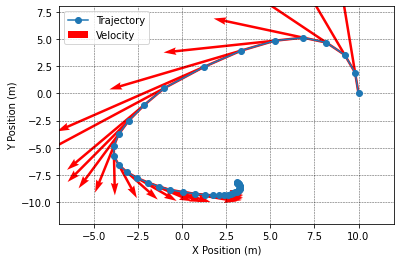

In [13]:
# Example plot of spiralling mass slowing down
positions = np.array(position)
plt.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(-7, 12)  
plt.ylim(-12, 8) 
plt.plot(positions[:, 0], positions[:, 1], marker='o', label="Trajectory") # plot point mass path
plt.quiver(positions[:-1, 0], positions[:-1, 1], velocities[:, 0], velocities[:, 1], color='r', label="Velocity", scale=1, angles='xy', scale_units='xy') # plot velocity vectors
plt.legend()
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.show()

In [2]:
help(quadrupole_moment)
help(qdrpl_trajectory)

Help on function quadrupole_moment in module scripts:

quadrupole_moment(masses, positions)
    Calculate the 2D quadrupole moment for a pair of masses (masses = [m1, m2]). 
    
    Insert data as list of masses and positions (positions = [[x1, y1], [x2, y2]])

Help on function qdrpl_trajectory in module scripts:

qdrpl_trajectory(masses, trajectories)
    Find the quadrupole moment at each point in the 2D trajectory of two masses.
    Insert data as list of masses and trajectories, with list of trajectories being a list of positions for each mass
    
    Input:
    masses = [m1, m2]
    trajectories = [
                    [[x1_m1, y1_m1], [x2_m1, y2_m1], [...], ...], 
                    [[x1_m2, y1_m2], [x2_m2, y2_m2], [...], ...]
    ]
    
    Outputs a list of quadrupole moment tensors (2x2) at each position / time step
    For exporting data use list(quadrupole_moments), for dispaying use enumerate(quadrupole moments)



In [3]:
m1 = 1
m2 = 2
positions = [[5, 6], [1, 2]] 
masses = [m1, m2]
Q = quadrupole_moment(masses, positions)
Q

array([[ 10., 102.],
       [102.,  61.]])

In [5]:
m1 = 1
m2 = 2
masses = [m1, m2]

trajectories = [
    [[5, 6], [6, 7], [7, 8]],  
    [[1, 2], [2, 3], [3, 4]]  
]

quadrupole_moments = qdrpl_trajectory(masses, trajectories)

for t, Q_t in enumerate(quadrupole_moments):
    print(f"Quadrupole Moment Tensor at time t{t+1}:")
    print(Q_t)
    print()

Quadrupole Moment Tensor at time t1:
[[ 10. 102.]
 [102.  61.]]

Quadrupole Moment Tensor at time t2:
[[ 21. 162.]
 [162.  90.]]

Quadrupole Moment Tensor at time t3:
[[ 38. 240.]
 [240. 125.]]



In [2]:
df = pd.read_csv("binary_orbit_data.csv")

trajectory = []

for _, row in df.iterrows():
    # Create MassPoint objects for each mass
    mass1_point = MassPoint(mass=row['Mass1'], x=row['Mass1_x'], y=row['Mass1_y'])
    mass2_point = MassPoint(mass=row['Mass2'], x=row['Mass2_x'], y=row['Mass2_y'])
    
    # Append MassPoint positions to trajectory []
    trajectory.append([mass1_point, mass2_point])


ModuleNotFoundError: No module named 'fromACC'